<a href="https://colab.research.google.com/github/girl-hasnoname/SGITEGD-returns-VaR-project/blob/main/SGITEGD_VF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import yfinance as yf
import pandas as pd
import numpy as np
import openpyxl

# Define the index and tickers of interest
index_tickers = ['ABBN.SW', 'ANA.MC', 'AI.PA', 'ALFA.ST', 'ALFEN.AS', 'ALO.PA', 'BILL.ST', 'ORSTED.CO',
                 'EDPR.LS', 'ELI.BR', 'ENEL.MI', 'ENR.DE', 'EOAN.DE', 'ERG.MI', 'ECV.DE', 'IBE.MC', 'IFX.DE',
                 'ITM.L', 'KBX.DE', 'KRX.IR', 'LR.PA', 'LIGHT.AS', 'NEOEN.PA', 'NESTE.HE', 'NEX.PA', 'NIBE-B.ST',
                 'NDX1.DE', 'PCELL.ST', 'PRY.MI', 'RED.MC', 'ROCK-B.CO', 'RWE.DE', 'RXL.PA', 'S92.DE', 'SGO.PA',
                 'SU.PA', 'STMPA.PA', 'SIE.DE', 'SIKA.SW', 'SK3.IR', 'SLR.MC', 'SMDS.L', 'SOI.PA', 'SPIE.PA',
                 'SRAIL.SW', 'TOM.OL', 'TRN.MI', 'UMI.BR', 'VBK.DE', 'VWS.CO', 'VIE.PA', 'WCH.DE']

# Define the start and end dates of the data to retrieve
start_date = '2023-01-01'
end_date = '2023-03-31'

# Define the columns of interest
columns = ['Close', 'Adj Close', 'Open']

# Create an empty DataFrame to store the data
Data = pd.DataFrame()

# Loop over each ticker
for ticker in index_tickers:
    # Download the data for the ticker
    ticker_data = yf.download(ticker, start=start_date, end=end_date)
    
    # Select the columns of interest
    ticker_data = ticker_data[columns]
    
    # Rename the columns to include the ticker name
    ticker_data.columns = [f"{ticker}_{col}" for col in columns]
    
    # Concatenate the ticker data to the Data DataFrame
    Data = pd.concat([Data, ticker_data], axis=1)

# Format date column as yyyy-mm-dd for Data
Data.index = pd.to_datetime(Data.index).strftime('%Y-%m-%d')

# Create an empty DataFrame to store the returns
returns = pd.DataFrame()

# Loop over each ticker
for ticker in index_tickers:
    # Calculate the returns for the ticker
    ticker_returns = (Data[f"{ticker}_Adj Close"] - Data[f"{ticker}_Open"]) / Data[f"{ticker}_Open"]
    
    # Store the returns in the returns DataFrame with the ticker as the column name
    returns[ticker] = ticker_returns
    
# Format date column as yyyy-mm-dd for returns 
returns.index = pd.to_datetime(returns.index).strftime('%Y-%m-%d')

# Calculate the sum of returns for each ticker and add as a row to returns DataFrame
returns.loc['sum'] = returns.sum()

# Calculate the average return for each ticker over the period, excluding the sum row
returns.loc['mean'] = returns[:-1].mean()   

# Calculate the sum of returns for each day and add as a column to returns DataFrame
returns['sum'] = returns.sum(axis=1)

# Calculate the average return for each day over the period, excluding the sum column
returns['mean'] = returns.iloc[:, :-1].mean(axis=1)

# Calculate the volatility for each ticker and add as a row to returns DataFrame
returns.loc['volatility'] = returns[:-2].std()

# Calculate the average volatility for each day over the period, excluding the sum column
returns['volatility'] = returns.iloc[:, :-2].mean(axis=1)

# Export the data to Excel
filename = 'SGI_European_Green_Deal_data.xlsx'
with pd.ExcelWriter(filename) as writer:
    Data.to_excel(writer, sheet_name='Data', index_label='Date')
    returns_formatted = returns.applymap("{:.5f}%".format)
    returns_formatted.to_excel(writer, sheet_name='Returns', index_label='Date')

# Load the Excel file
filename = 'SGI_European_Green_Deal_data.xlsx'
workbook = openpyxl.load_workbook(filename)

# Select the sheet
sheet = workbook['Returns']

# Get the desired cells
cell_BC67 = sheet['BC66']
cell_BB68 = sheet['BB68']

# Set the cell values
average_return = cell_BC67.value
average_risk = cell_BB68.value

# Highlight the cells
highlight_color = openpyxl.styles.PatternFill(start_color="FFFF00", end_color="FFFF00", fill_type="solid")
for cell in ['BC66', 'BB68']:
    sheet[cell].fill = highlight_color

# Save the modified workbook
workbook.save(filename)

# Display the sentences
print("Average return for SGITEGD index over the period from 1st of January 2023 to 30 March of 2023 is", average_return)
print("Average risk for SGITEGD index over the period from 1st of January 2023 to 30 March of 2023 is", average_risk)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

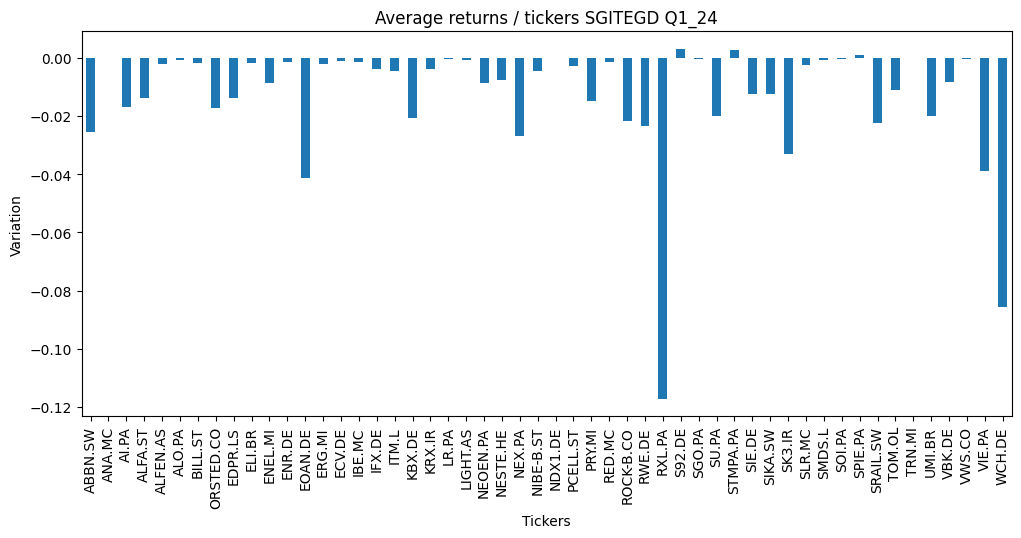

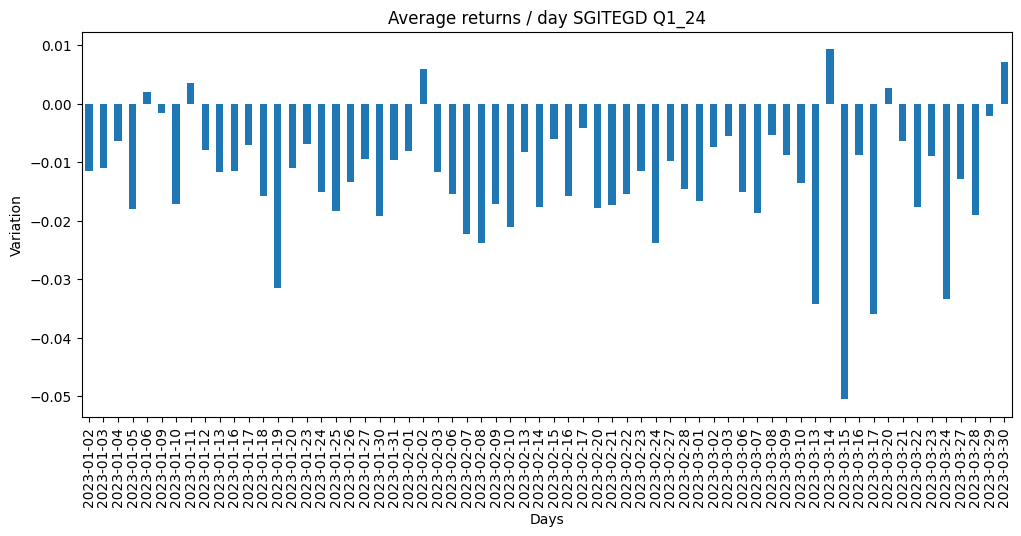

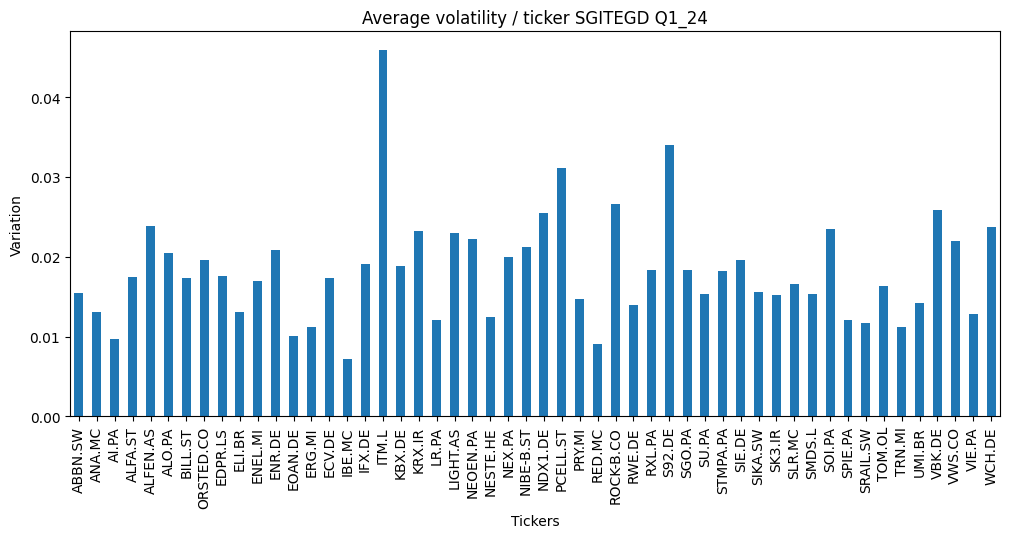

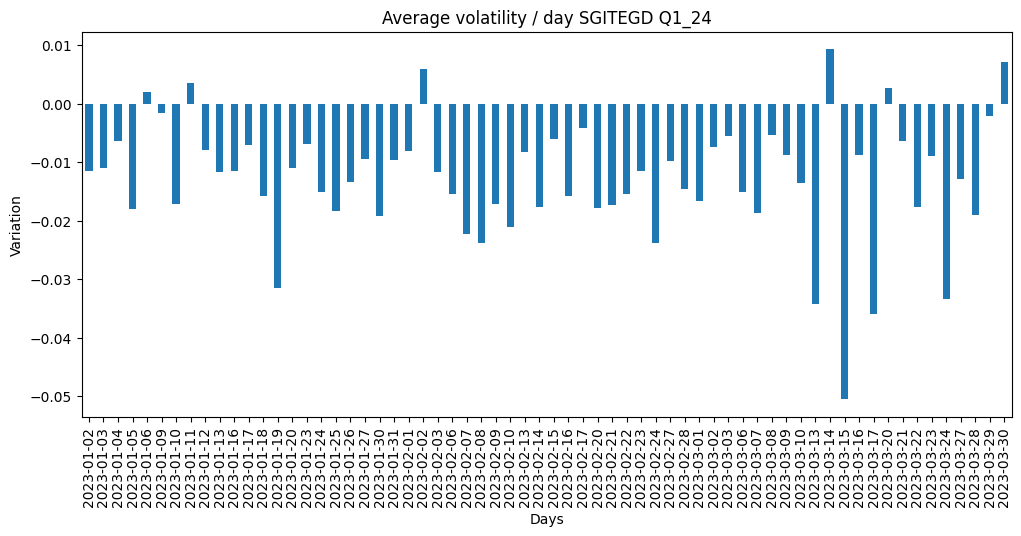

In [60]:
# Graphical part

import plotly.express as px
import matplotlib.pyplot as plt

returns.loc['mean'][:-3].plot(kind='bar', rot=90, figsize=(12, 5)).set(xlabel='Tickers', ylabel='Variation', title='Average returns / tickers SGITEGD Q1_24')
plt.show()

returns['mean'][:-3].plot(kind='bar', rot=90, figsize=(12, 5)).set(xlabel='Days', ylabel='Variation', title='Average returns / day SGITEGD Q1_24')
plt.show()

returns.loc['volatility'][:-3].plot(kind='bar', rot=90, figsize=(12, 5)).set(xlabel='Tickers', ylabel='Variation', title='Average volatility / ticker SGITEGD Q1_24')
plt.show()

returns['volatility'][:-3].plot(kind='bar', rot=90, figsize=(12, 5)).set(xlabel='Days', ylabel='Variation', title='Average volatility / day SGITEGD Q1_24')
plt.show()